In [1]:
# %%

import torch
from ncut_pytorch.predictor import NcutDinov3Predictor
from PIL import Image
import numpy as np

In [2]:
# %%

predictor = NcutDinov3Predictor()
predictor = predictor.to('cuda')

default_images = ['./images/view_0.jpg', './images/view_1.jpg', './images/view_2.jpg', './images/view_3.jpg', './images/view_ego.jpg', './images/image2.jpg']

images = [Image.open(image_path) for image_path in default_images]
predictor.set_images(images)

Using cache found in /root/.cache/torch/hub/facebookresearch_dinov3_main


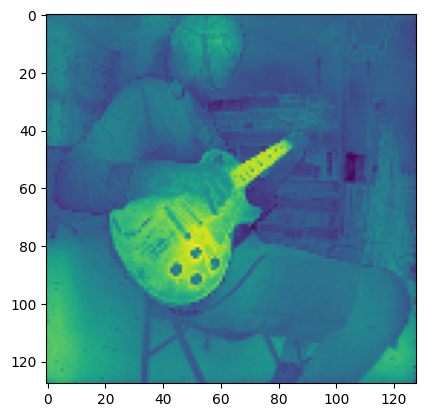

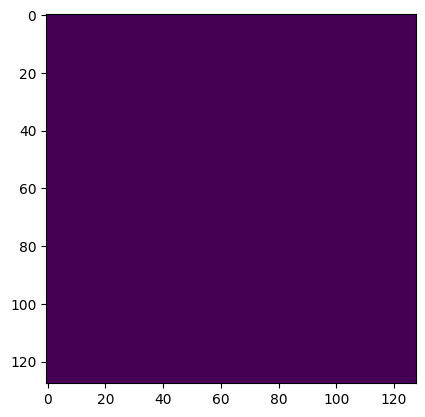

In [ ]:
# %%

mask, heatmap = predictor.predict(
    np.array([[500, 500]]), np.array([1]), np.array([0]), 
    click_weight=0.5,
    bg_weight=0.1,
    )

import matplotlib.pyplot as plt
plt.imshow(heatmap[1].cpu().numpy())
plt.show()
plt.imshow(mask[1].cpu().numpy())
plt.show()

In [ ]:
# %%

import matplotlib.pyplot as plt

In [ ]:
# %%

%matplotlib widget

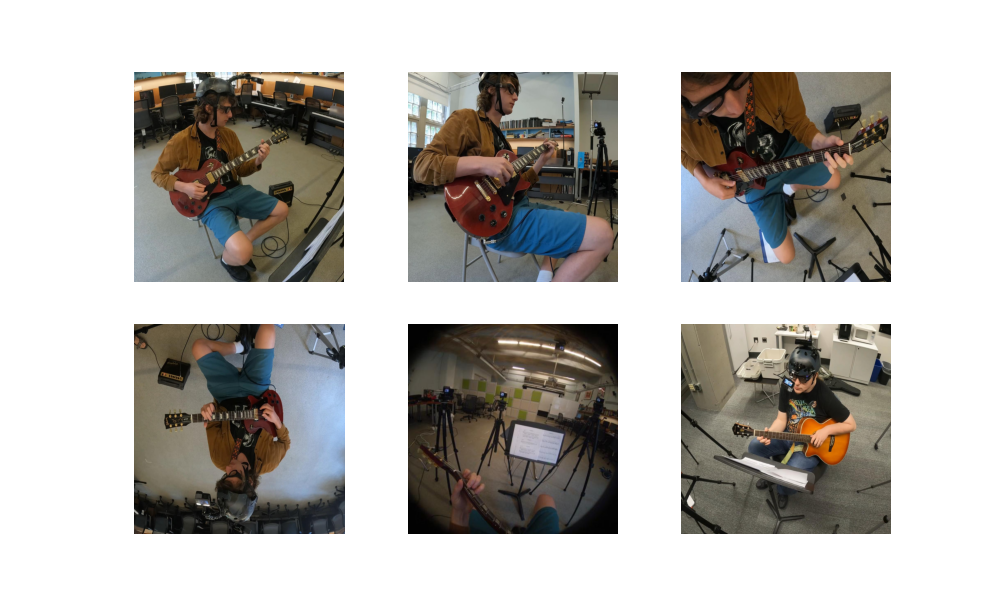

In [ ]:
# %%

import numpy as np
import torch

# Assume you have a PIL image loaded as `img` and predictor already set up
# predictor.set_images([img])

img_list = images  # All three images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

# Show all images
for ax, img in zip(axes, img_list):
    ax.imshow(img)
    ax.set_axis_off()

# Store the last mask for each image
last_masks = [None, None, None, None, None, None]

# Map axes to image indices
ax_to_idx = {ax: idx for idx, ax in enumerate(axes)}

def onclick(event):
    click_coords_per_image = [[] for _ in range(6)]
    for idx, ax in enumerate(axes):
        if event.inaxes == ax:
            x, y = int(event.xdata), int(event.ydata)
            click_coords_per_image[idx] = [[x, y]]
            # click_coords_per_image[idx].append([x, y])
            break
    else:
        return  # Click not in any axis

    # Prepare input arrays for predictor
    point_coords = []
    point_labels = []
    image_indices = []
    for img_idx, coords in enumerate(click_coords_per_image):
        for pt in coords:
            point_coords.append(pt)
            point_labels.append(1)  # All foreground for demo
            image_indices.append(img_idx)
    if not point_coords:
        return
    point_coords = np.array(point_coords)
    point_labels = np.array(point_labels, dtype=int)
    image_indices = np.array(image_indices, dtype=int)

    # Run prediction
    mask, heatmap = predictor.predict(
        point_coords, point_labels, image_indices,
        click_weight=0.8, bg_weight=0.1,
        # matmul_chunk_size=65536,
    )

    # Update all axes with new masks
    for i, (ax, img) in enumerate(zip(axes, img_list)):
        ax.clear()
        ax.imshow(img)
        mask_img = mask[i].cpu().numpy()
        mask_img = Image.fromarray(mask_img)
        mask_img = mask_img.resize((img.width, img.height))
        ax.imshow(mask_img, alpha=0.5, cmap='jet')
        ax.set_axis_off()
    plt.draw()

# Connect the click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()